# Load Preprocessed Data

In [28]:
import numpy as np
import pandas as pd

df = pd.read_csv('../../cleaned-data-kbk.csv', index_col=0)
df.head()

,judul,abstrak,kbk,judul_tokens,abstrak_tokens
0,pengembangan sistem pendukung keputusan untuk ...,sistem pendukung keputusan spk merupakan suatu...,Pengembangan Aplikasi dan Media Pembelajaran T...,kembang sistem dukung putus tentu dosen bimbin...,sistem dukung putus spk sistem milik kemampuan...
1,hubungan efikasi diri dengan kesiapan kerja lu...,pandemi covid 19 yang melanda dunia terutama i...,Ketenegakerjaan Teknologi dan Kejuruan,hubung efikasi kesiap kerja lulus smk negeri k...,pandemi covid 19 landa dunia indonesia 2020 da...
2,alat bantu penyandang tuetra berbasis deteksi ...,tujuan dilakukannya penelitian ini untuk memba...,Biomedic and Intelligent Assistive Technology ...,alat bantu sandang tuetra bas deteksi objek re...,tuju laku teliti bantu sandang tuetra gerak ma...
3,analisis thermovisi penghantar akibat transmis...,gardu induk waru merupakan sub transmisi listr...,Intelligent Power Electronics and Smart Grid (...,analisis thermovisi hantar akibat transmission...,gardu induk waru sub transmisi listrik kota si...
4,pengembangan modulberbasis production based ed...,mata pelajaran dasar desain grafis merupakan m...,Pengembangan Aplikasi dan Media Pembelajaran T...,kembang modulberbasis production based educati...,mata ajar dasar desain grafis mata ajar wajib ...


In [29]:
df['judtrak'] = [' '.join(i) for i in zip(df['judul'], df['abstrak'])]

# Split Data

In [30]:
from sklearn.model_selection import train_test_split

X = df['judul']
# y = df['kbk']
y = pd.factorize(df['kbk'])[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Extraction: TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train_tfidf.shape

(884, 2564)

In [32]:
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train', 
                                      categories=['alt.atheism', 'sci.space'])

data1 = pd.Series(data=newsgroups_train)

data= pd.Series(newsgroups_train.data)
data=pd.DataFrame(data)
data.columns = ['Data'] + data.columns.tolist()[1:]
data['target'] = pd.Series(newsgroups_train.target)
print(data)

                                                   Data  target
0     From: bil@okcforum.osrhe.edu (Bill Conner)\nSu...       0
1     From: jhwitten@cs.ruu.nl (Jurriaan Wittenberg)...       1
2     From: sysmgr@king.eng.umd.edu (Doug Mohney)\nS...       1
3     From: pgf@srl03.cacs.usl.edu (Phil G. Fraering...       1
4     From: Nanci Ann Miller <nm0w+@andrew.cmu.edu>\...       0
...                                                 ...     ...
1068  From: sysmgr@king.eng.umd.edu (Doug Mohney)\nS...       1
1069  From: kjenks@jsc.nasa.gov (Ken Jenks [NASA])\n...       1
1070  From: nicho@vnet.IBM.COM (Greg Stewart-Nicholl...       1
1071  From: eder@hsvaic.boeing.com (Dani Eder)\nSubj...       1
1072  From: bill@xpresso.UUCP (Bill Vance)\nSubject:...       1

[1073 rows x 2 columns]


C:\Users\tungg\.conda\envs\butterfly\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\tungg\.conda\envs\butterfly\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


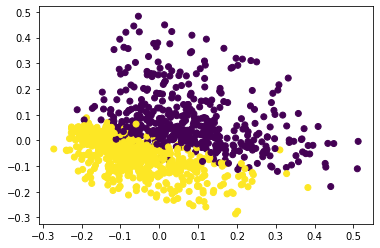

In [33]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

newsgroups_train = fetch_20newsgroups(subset='train', 
                                      categories=['alt.atheism', 'sci.space'])

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X1 = pipeline.fit_transform(data['Data']).todense()

pca = PCA(n_components=2).fit(X1)
data2D = pca.transform(X1)
plt.scatter(data2D[:,0], data2D[:,1], c=newsgroups_train.target)
plt.show()

C:\Users\tungg\.conda\envs\butterfly\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\tungg\.conda\envs\butterfly\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


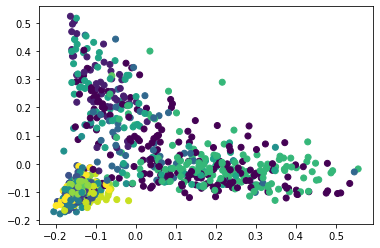

In [34]:
test = X_train_tfidf.todense()

pca = PCA(n_components=2).fit(test)
data2D = pca.transform(test)
plt.scatter(data2D[:,0], data2D[:,1], c=y_train)
plt.show()

C:\Users\tungg\.conda\envs\butterfly\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\tungg\.conda\envs\butterfly\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


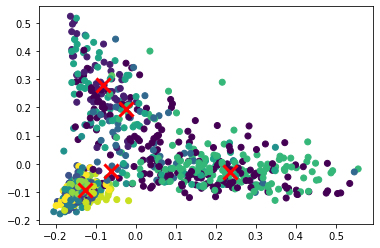

In [36]:
## Nearest neighbour
kmeans = KMeans(n_clusters=5).fit(test)
centers2D = pca.transform(kmeans.cluster_centers_)

# plt.hold(True)
plt.scatter(data2D[:,0], data2D[:,1], c=y_train)
plt.scatter(centers2D[:,0], centers2D[:,1], 
            marker='x', s=200, linewidths=3, c='r')
plt.show()

In [17]:
terms = vectorizer.get_feature_names()

sums = X_train_tfidf.sum(axis=0)

data = []
for col, term in enumerate (terms):
    data.append((term, sums[0,col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
print(ranking.sort_values('rank', ascending=False))

              term       rank
466            dan  40.098945
1549          pada  39.591130
514             di  33.747980
1624  pembelajaran  33.275979
2137         siswa  32.926014
...            ...        ...
1094     kewajiban   0.194854
2051       sarjana   0.194854
1190         layer   0.194854
1338   mendapatkan   0.194854
2220         suatu   0.194854

[2564 rows x 2 columns]


C:\Users\tungg\.conda\envs\butterfly\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



# Oversampling: SMOTE

In [25]:
y_train.value_counts()

Pengembangan Aplikasi dan Media Pembelajaran Teknologi dan Kejuruan              194
Strategi Pembelajaran Teknologi dan Kejuruan                                     147
Kurikulum Pendidikan Teknologi dan Kejuruan                                       72
Intelligent Power and Advanced energy System (IPAES)                              68
Rekayasa pengetahuan dan ilmu data (Knowledge Engineering and Data Science)       66
Intelligent Power Electronics and Smart Grid (IPESG)                              64
Ketenegakerjaan Teknologi dan Kejuruan                                            54
Game Technology and Machine Learning Applications                                 53
Evaluasi dan Pengelolaan Pendidikan Kejuruan                                      47
Telematics loT System and Devices                                                 44
Teknologi Digital Cerdas (Ubiquitous Computing Technique)                         41
Biomedic and Intelligent Assistive Technology (TAT)              

In [26]:
from imblearn.over_sampling import SMOTE

X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train_tfidf, y_train)

y_train_resampled.value_counts()

Game Technology and Machine Learning Applications                                194
Teknologi Digital Cerdas (Ubiquitous Computing Technique)                        194
Strategi Pembelajaran Teknologi dan Kejuruan                                     194
Rekayasa pengetahuan dan ilmu data (Knowledge Engineering and Data Science)      194
Biomedic and Intelligent Assistive Technology (TAT)                              194
Pengembangan Aplikasi dan Media Pembelajaran Teknologi dan Kejuruan              194
Intelligent Power Electronics and Smart Grid (IPESG)                             194
Evaluasi dan Pengelolaan Pendidikan Kejuruan                                     194
Sistem Dinamis, Kendali, dan Robotika (Dynamic Systems, Control and Robotics)    194
Kurikulum Pendidikan Teknologi dan Kejuruan                                      194
Intelligent Power and Advanced energy System (IPAES)                             194
Ketenegakerjaan Teknologi dan Kejuruan                           

# Training Model

## GridSearchCV

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'criterion':['gini','entropy', 'log_loss'],'max_depth':[10, 20, 30, None]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='roc_auc_ovr', cv=10, verbose=3)

# fitting the model for grid search
grid.fit(X_train_resampled, y_train_resampled)


Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END .....criterion=gini, max_depth=10;, score=0.868 total time=   0.7s
[CV 2/10] END .....criterion=gini, max_depth=10;, score=0.859 total time=   0.6s
[CV 3/10] END .....criterion=gini, max_depth=10;, score=0.874 total time=   0.7s
[CV 4/10] END .....criterion=gini, max_depth=10;, score=0.917 total time=   0.7s
[CV 5/10] END .....criterion=gini, max_depth=10;, score=0.941 total time=   0.6s
[CV 6/10] END .....criterion=gini, max_depth=10;, score=0.929 total time=   0.6s
[CV 7/10] END .....criterion=gini, max_depth=10;, score=0.966 total time=   0.6s
[CV 8/10] END .....criterion=gini, max_depth=10;, score=0.939 total time=   0.5s
[CV 9/10] END .....criterion=gini, max_depth=10;, score=0.954 total time=   0.6s
[CV 10/10] END ....criterion=gini, max_depth=10;, score=0.943 total time=   0.6s
[CV 1/10] END .....criterion=gini, max_depth=20;, score=0.835 total time=   0.7s
[CV 2/10] END .....criterion=gini, max_depth=2

[CV 2/10] END .criterion=log_loss, max_depth=30;, score=0.842 total time=   1.3s
[CV 3/10] END .criterion=log_loss, max_depth=30;, score=0.867 total time=   1.3s
[CV 4/10] END .criterion=log_loss, max_depth=30;, score=0.900 total time=   1.4s
[CV 5/10] END .criterion=log_loss, max_depth=30;, score=0.933 total time=   1.4s
[CV 6/10] END .criterion=log_loss, max_depth=30;, score=0.941 total time=   1.3s
[CV 7/10] END .criterion=log_loss, max_depth=30;, score=0.940 total time=   1.3s
[CV 8/10] END .criterion=log_loss, max_depth=30;, score=0.918 total time=   1.3s
[CV 9/10] END .criterion=log_loss, max_depth=30;, score=0.953 total time=   1.4s
[CV 10/10] END criterion=log_loss, max_depth=30;, score=0.940 total time=   1.3s
[CV 1/10] END criterion=log_loss, max_depth=None;, score=0.804 total time=   1.3s
[CV 2/10] END criterion=log_loss, max_depth=None;, score=0.827 total time=   1.3s
[CV 3/10] END criterion=log_loss, max_depth=None;, score=0.860 total time=   1.3s
[CV 4/10] END criterion=l

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30, None]},
             scoring='roc_auc_ovr', verbose=3)

In [9]:
# Tabel hasil GridSearchCV
results_df = pd.DataFrame(grid.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.705970,0.051697,0.007301,0.000638,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.868027,0.858994,0.873595,0.916985,0.941134,0.929304,0.966176,0.938704,0.953679,0.942627,0.918923,0.036380,2
1,0.818122,0.019295,0.006799,0.000399,gini,20,"{'criterion': 'gini', 'max_depth': 20}",0.834754,0.841584,0.863916,0.924423,0.942245,0.943355,0.954304,0.949683,0.946265,0.945942,0.914647,0.045558,4
2,0.847463,0.018265,0.006599,0.000490,gini,30,"{'criterion': 'gini', 'max_depth': 30}",0.822447,0.814356,0.835978,0.913629,0.943453,0.938425,0.944386,0.937312,0.950243,0.946267,0.904650,0.053675,5
3,0.856811,0.020460,0.006598,0.000661,gini,None,"{'criterion': 'gini', 'max_depth': None}",0.811914,0.827145,0.842686,0.920096,0.928153,0.928353,0.944082,0.941485,0.946169,0.952533,0.904262,0.051697,7
4,1.301693,0.035794,0.007400,0.001419,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.874102,0.860517,0.890370,0.916106,0.937239,0.934156,0.943855,0.932099,0.946837,0.965146,0.920043,0.032418,1
5,1.509976,0.105398,0.006902,0.000540,entropy,20,"{'criterion': 'entropy', 'max_depth': 20}",0.812115,0.850816,0.860203,0.892313,0.936909,0.941287,0.930949,0.921881,0.950747,0.943675,0.904089,0.045392,8
6,1.665263,0.151498,0.008307,0.002155,entropy,30,"{'criterion': 'entropy', 'max_depth': 30}",0.816194,0.842363,0.858012,0.892034,0.936909,0.936807,0.939605,0.908843,0.950544,0.952433,0.903374,0.046611,9
7,1.451845,0.068175,0.006700,0.000640,entropy,None,"{'criterion': 'entropy', 'max_depth': None}",0.799287,0.831828,0.866265,0.894123,0.936908,0.945463,0.926666,0.917602,0.948456,0.952232,0.901883,0.050452,12
8,1.403303,0.099633,0.007098,0.000701,log_loss,10,"{'criterion': 'log_loss', 'max_depth': 10}",0.865201,0.869643,0.880753,0.918498,0.949402,0.936792,0.939236,0.927573,0.946461,0.951419,0.918498,0.032125,3
9,1.640856,0.205243,0.008300,0.002542,log_loss,20,"{'criterion': 'log_loss', 'max_depth': 20}",0.812119,0.831722,0.866773,0.898703,0.930340,0.932733,0.935428,0.921780,0.948456,0.943573,0.902163,0.046273,11


In [10]:
# Peringkat Score Parameter hasil GridSearchCV
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("criterion")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
criterion,,,,
entropy_10,"{'criterion': 'entropy', 'max_depth': 10}",1,0.920043,0.032418
gini_10,"{'criterion': 'gini', 'max_depth': 10}",2,0.918923,0.036380
log_loss_10,"{'criterion': 'log_loss', 'max_depth': 10}",3,0.918498,0.032125
gini_20,"{'criterion': 'gini', 'max_depth': 20}",4,0.914647,0.045558
gini_30,"{'criterion': 'gini', 'max_depth': 30}",5,0.904650,0.053675
log_loss_30,"{'criterion': 'log_loss', 'max_depth': 30}",6,0.904291,0.046224
gini_None,"{'criterion': 'gini', 'max_depth': None}",7,0.904262,0.051697
entropy_20,"{'criterion': 'entropy', 'max_depth': 20}",8,0.904089,0.045392
entropy_30,"{'criterion': 'entropy', 'max_depth': 30}",9,0.903374,0.046611


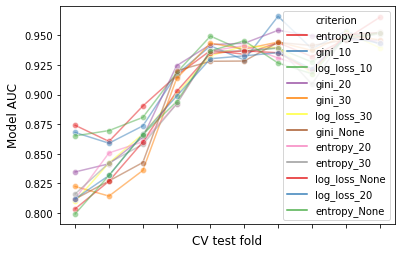

Correlation of models:
 criterion      entropy_10   gini_10  log_loss_10   gini_20   gini_30  \
criterion                                                              
entropy_10       1.000000  0.945466     0.970171  0.947349  0.961836   
gini_10          0.945466  1.000000     0.953133  0.968015  0.972892   
log_loss_10      0.970171  0.953133     1.000000  0.968558  0.984005   
gini_20          0.947349  0.968015     0.968558  1.000000  0.991316   
gini_30          0.961836  0.972892     0.984005  0.991316  1.000000   
log_loss_30      0.938139  0.933554     0.969953  0.963254  0.957995   
gini_None        0.957417  0.961387     0.970473  0.991871  0.986853   
entropy_20       0.932639  0.919346     0.972573  0.953963  0.953521   
entropy_30       0.958367  0.936829     0.983223  0.949071  0.956492   
log_loss_None    0.965483  0.938459     0.983566  0.971895  0.971106   
log_loss_20      0.963024  0.945022     0.977588  0.973544  0.969683   
entropy_None     0.946877  0.902996     

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# create df of model scores ordered by performance
model_scores = results_df.filter(regex=r"split\d*_test_score")

# plot 30 examples of dependency between cv fold and AUC scores
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose().iloc[:30],
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=20)
ax.tick_params(bottom=True, labelbottom=False)
plt.show()

# print correlation of AUC scores across folds
print(f"Correlation of models:\n {model_scores.transpose().corr()}")

In [12]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
model = clf.fit(X_train_resampled,y_train_resampled)

[Text(0.6764953796203796, 0.9545454545454546, 'X[10427] <= 0.0\nentropy = 3.7\nsamples = 2522\nvalue = [194, 194, 194, 194, 194, 194, 194, 194, 194, 194\n194, 194, 194]'),
 Text(0.4850774225774226, 0.8636363636363636, 'X[5849] <= 0.024\nentropy = 3.482\nsamples = 1772\nvalue = [183, 25, 192, 194, 194, 61, 50, 74, 174, 194, 43\n194, 194]'),
 Text(0.35889110889110887, 0.7727272727272727, 'X[10122] <= 0.0\nentropy = 3.324\nsamples = 1355\nvalue = [174, 24, 192, 40, 15, 56, 42, 60, 173, 188, 33\n194, 164]'),
 Text(0.24725274725274726, 0.6818181818181818, 'X[662] <= 0.03\nentropy = 3.212\nsamples = 986\nvalue = [40, 24, 183, 38, 11, 56, 41, 54, 173, 130, 33\n189, 14]'),
 Text(0.15784215784215785, 0.5909090909090909, 'X[5998] <= 0.026\nentropy = 3.262\nsamples = 730\nvalue = [29, 24, 75, 23, 9, 56, 41, 51, 62, 130, 33, 183\n14]'),
 Text(0.10139860139860139, 0.5, 'X[7749] <= 0.0\nentropy = 2.865\nsamples = 541\nvalue = [29, 11, 66, 22, 8, 9, 4, 21, 38, 124, 12, 183\n14]'),
 Text(0.06093906093

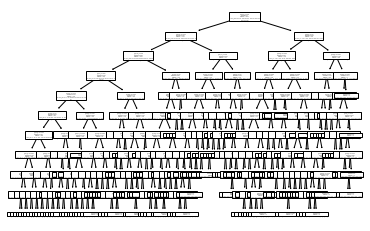

In [13]:
from sklearn import tree

tree.plot_tree(model) 

In [14]:
print('Decision Tree depth : ',model.get_depth())
print('Decision Tree n leaves : ',model.get_n_leaves())

Decision Tree depth :  10
Decision Tree n leaves :  189


# Evaluation

In [15]:
predictions = model.predict(X_test_tfidf)

In [16]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[ 2  0  4  2  0  0  0  0  1  1  0  1  2]
 [ 0  6  2  0  0  1  1  1  0  0  4  0  0]
 [ 1  0 11  2  0  1  0  2  7  0  0  3  0]
 [ 0  0  4  9  6  0  0  0  2  1  0  1  1]
 [ 0  0  0  3 15  1  0  2  1  0  0  0  0]
 [ 0  2  4  1  0 12  7  1  0  2  1  0  1]
 [ 1  1  2  0  0  7  4  1  0  0  6  1  0]
 [ 1  4  4  1  0  2  4 54  1  1 11  3  2]
 [ 0  2  8  3  1  0  2  1 15  0  0  1  0]
 [ 0  0  1  1  1  0  0  0  0  2  0  0  2]
 [ 0  6  0  0  0  1  3 14  2  0 35  1  0]
 [ 0  0  5  0  0  0  1  2  3  1  1  8  0]
 [ 2  0  1  3  2  0  0  1  1  2  0  0  2]]


C:\Users\tungg\.conda\envs\butterfly\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


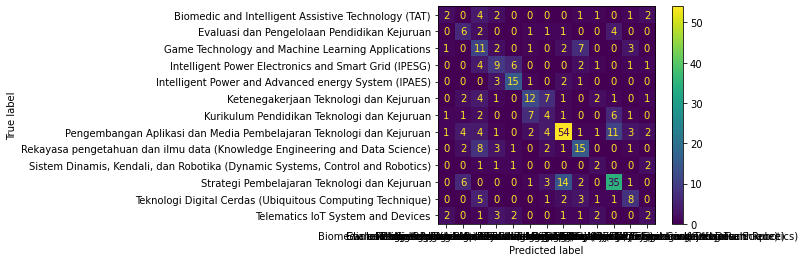

In [17]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test_tfidf, y_test) 
plt.show()

In [18]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

                                                                               precision    recall  f1-score   support

                          Biomedic and Intelligent Assistive Technology (TAT)       0.29      0.15      0.20        13
                                 Evaluasi dan Pengelolaan Pendidikan Kejuruan       0.29      0.40      0.33        15
                            Game Technology and Machine Learning Applications       0.24      0.41      0.30        27
                         Intelligent Power Electronics and Smart Grid (IPESG)       0.36      0.38      0.37        24
                         Intelligent Power and Advanced energy System (IPAES)       0.60      0.68      0.64        22
                                       Ketenegakerjaan Teknologi dan Kejuruan       0.48      0.39      0.43        31
                                  Kurikulum Pendidikan Teknologi dan Kejuruan       0.18      0.17      0.18        23
          Pengembangan Aplikasi dan Media Pembe

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Print the overall metrics
print('Accuracy score : ', accuracy_score(y_test, predictions))
print('Precision score : ', precision_score(y_test, predictions, average='weighted'))
print('Recall score : ', recall_score(y_test, predictions, average='weighted'))
print('F1 score : ', f1_score(y_test, predictions, average='weighted'))

Accuracy score :  0.4605263157894737
Precision score :  0.476226676372979
Recall score :  0.4605263157894737
F1 score :  0.46428344121663856


# Export Model

In [20]:
from joblib import dump

dump(model, filename="model/dtc-model-judtrak.joblib")
dump(vectorizer, filename="model/vectorizer_model_judtrak.joblib")

['model/dtc-model-judtrak.joblib']

# Demo

In [21]:
title_input = input("Masukkan Judul dan Abstrak Skripsi:\n")

'''
catatan input:
klasifikasi judul skripsi berdasarkan kbk dengan metode decision tree sisinta um adalah sistem informasi berbasis website bertujuan untuk menampilkan data yang berkaitan dengan skripsi dan tugas akhir pada jurusan teknik elektro fakultas teknik universitas negeri malang. penggunaan sistem informasi sisinta memiliki potensi jika dikembangkan dengan mengklasifikasikan judul dan abstrak berdasarkan tema penelitiannya. tujuan penelitian ini adalah untuk menerapkan dan menguji performa algoritma decision tree classifier dalam mengklasifikasi judul skripsi dan tugas akhir, berdasarkan tema penelitian dalam kbk di jurusan teknik elektro ft um. decision tree classifier adalah algoritma supervised learning non-parametrik, yang digunakan untuk klasifikasi dan regresi. decision tree memiliki hierarki, struktur pohon, yang terdiri dari root node, branches, internal nodes dan leaf nodes. dengan menggunakan metode decision tree classifier dalam implementasinya diharapkan dapat memprediksi jenis kelompok bidang keahlian yang sesuai. data yang digunakan dalam penelitian sistem klasifikasi ini didapatkan dari database sisinta te-um berupa judul, abstrak, dan kbk yang terkait dengan tema penelitian pada skripsi dan tugas akhir tersebut.
'''

hasil = clf.predict_proba(vectorizer.transform([title_input]))

print(f"Judul dan Abstrak Skripsi: {title_input}")

list1 = hasil.tolist()
cls = clf.classes_
list2 = cls.tolist()

d = {"Kelompok Bidang Keahlian":list2,"Probability":list1[0]}
df_proba = pd.DataFrame(d)

print(df_proba.sort_values("Probability", ascending=False))

Masukkan Judul dan Abstrak Skripsi:
klasifikasi judul skripsi berdasarkan kbk dengan metode decision tree sisinta um adalah sistem informasi berbasis website bertujuan untuk menampilkan data yang berkaitan dengan skripsi dan tugas akhir pada jurusan teknik elektro fakultas teknik universitas negeri malang. penggunaan sistem informasi sisinta memiliki potensi jika dikembangkan dengan mengklasifikasikan judul dan abstrak berdasarkan tema penelitiannya. tujuan penelitian ini adalah untuk menerapkan dan menguji performa algoritma decision tree classifier dalam mengklasifikasi judul skripsi dan tugas akhir, berdasarkan tema penelitian dalam kbk di jurusan teknik elektro ft um. decision tree classifier adalah algoritma supervised learning non-parametrik, yang digunakan untuk klasifikasi dan regresi. decision tree memiliki hierarki, struktur pohon, yang terdiri dari root node, branches, internal nodes dan leaf nodes. dengan menggunakan metode decision tree classifier dalam implementasinya dih